In [12]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
cap = cv2.VideoCapture("clip.mkv")

In [14]:
cap.set(1, 30*17+15)
ret, frame = cap.read()

In [15]:
type(frame)
print(frame.shape)

(1080, 1920, 3)


In [16]:
# frame = frame.crop(1000,220,2000,760)
frame = frame[225:765,990:1920,:]

In [17]:
image = Image.fromarray(frame)
image.show()

In [20]:
import cv2
from win32api import GetSystemMetrics

#the [x, y] for each right-click event will be stored here
right_clicks = list()

#this function will be called whenever the mouse is right-clicked
def mouse_callback(event, x, y, flags, params):

    #right-click event value is 2
    if event == 2:
        global right_clicks

        #store the coordinates of the right-click event
        right_clicks.append([x, y])
        cv2.circle(img,(x,y),10,(255,0,0),-1)
        cv2.imshow('image', img)
        #this just verifies that the mouse data is being collected
        #you probably want to remove this later
        print (right_clicks)
        
    if len(right_clicks) == 4:
        cv2.destroyAllWindows()
        
        
        

# path_image = frame
img = frame
scale_width = 640 / img.shape[1]
scale_height = 480 / img.shape[0]
scale = min(scale_width, scale_height)
window_width = int(img.shape[1] * scale)
window_height = int(img.shape[0] * scale)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', window_width, window_height)

#set mouse callback function for window
cv2.setMouseCallback('image', mouse_callback)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[273, 238]]
[[273, 238], [473, 219]]
[[273, 238], [473, 219], [478, 219]]
[[273, 238], [473, 219], [478, 219], [521, 209]]


In [7]:
import cv2
from win32api import GetSystemMetrics

#the [x, y] for each right-click event will be stored here
right_clicks = list()

#this function will be called whenever the mouse is double click
def mouse_callback(event, x, y, flags, params):

    #right-click event value is 2
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global right_clicks

        #store the coordinates of the right-click event
        right_clicks.append([x, y])
        cv2.circle(img,(x,y),10,(255,0,0),-1)
        cv2.imshow('image', img)

        #this just verifies that the mouse data is being collected
        #you probably want to remove this later
        print (right_clicks)
        cv2.waitKey(0)
        if len(right_clicks) == 4 :
            cv2.destroyAllWindows()
            
        
            

# path_image = frame
img = frame
scale_width = 640 / img.shape[1]
scale_height = 480 / img.shape[0]
scale = min(scale_width, scale_height)
window_width = int(img.shape[1] * scale)
window_height = int(img.shape[0] * scale)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', window_width, window_height)

#set mouse callback function for window
cv2.setMouseCallback('image', mouse_callback)
# cv2.destroyAllWindows()

In [184]:
transformed = np.float32([[1077, 2765], [1777, 2765], [1777, 2688], [1077, 2688]])
# transformed = np.float32([[187, 1458], [928, 1458], [928, 1275], [187, 1275]])

In [185]:
ori_coord = np.float32(right_clicks)
ori_coord

array([[1077.,  765.],
       [1777.,  763.],
       [1678.,  688.],
       [1170.,  684.]], dtype=float32)

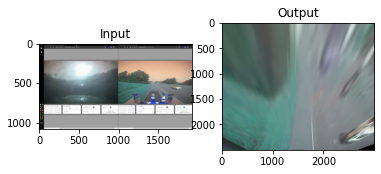

In [186]:
M = cv2.getPerspectiveTransform(ori_coord,transformed)
# 进行透视变换
dst = cv2.warpPerspective(img,M,(3000,2500))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [187]:
image = Image.fromarray(dst)
image.show()

In [ ]:
cap.release()
cv2.destroyAllWindows() # destroy all opened windows

In [63]:
M

array([[-6.57467931e-01, -1.52535458e+00,  7.27987219e+02],
       [-3.12662650e-01, -4.61492788e+00,  1.44254600e+03],
       [-2.15125137e-04, -3.18811119e-03,  1.00000000e+00]])